# <center> DENİZ BALCI SİMÜLASYON 3.ÖDEVİ</center>

# 1)  Paket Kurulumu ve Ön açıklama

Bütün hücreleri ayrı ayrı veya bütün halde çalıştırabilirsiniz.İlk olarak paketleri yükleyelim.

In [ ]:
!pip install scipy
!pip install numpy
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


# SORU 1




 \begin{equation}
 f(x) =
   \left\{\begin{array}{lr}
      \frac{3}{4}(1-x^2)  & -1 < x < 1 \\
     0 & dd
    \end{array}\right.
 \end{equation}

 Kabul red yöntemi ile
<ol style="list-style-type: lower-alpha;">
  <li>Ortalama </li>
  <li>Varyans,standart sapma</li>
<li>P(X< 0 ) </li>
</ol>
Değerlerini bulunuz.

## <center>ANAKÜTLE ÖZELLİKLERİ </center>

 \begin{equation}
 f(x) =
   \left\{\begin{array}{lr}
      \frac{3}{4}(1-x^2)  & -1 < x < 1 \\
     0 & dd
    \end{array}\right.
 \end{equation}

 \begin{equation}
 F(x) =
   \left\{\begin{array}{lr}
      \frac{3x-x^3-2}{4}  & -1 < x < 1
    \end{array}\right.
 \end{equation}

 E(X)=0

 Var(x)=1/5=0.2

 ve g(x)=3/4 şeklinde yazalım.


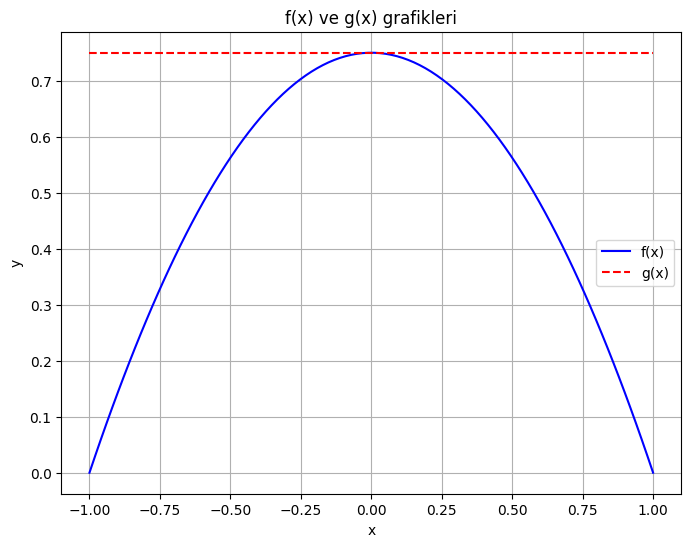

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# tanımladığımız f(x)
def f(x):
    return (3/4) * (1 - (x**2))

# tanımladığımız g(x)
def g(x):
    return np.full_like(x, 3/4)

#grafik çizmek için x değerlerini oluşturuyoruz
x_values = np.linspace(-1, 1, 100)

# her 2 fonksiyonun ye değerleri için ek veriseti hazırlıyoruz
f_values = f(x_values)
g_values = g(x_values)

# fonksiyon çizimi
plt.figure(figsize=(8, 6))
plt.plot(x_values, f_values, label='f(x)', color='blue')
plt.plot(x_values, g_values, label='g(x)', linestyle='--', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('f(x) ve g(x) grafikleri')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:

import numpy as np
def f(x):
    return (3/4) * (1 - (x**2))

def g(x):
     return np.full_like(x, 3/4)

#c yi bulmak için kullandığım fonksiyon
def find_c(N):
    datasett = np.random.uniform(-1, 1, N)
    generated_values = []
    for i in datasett:
        valuee = f(i) / g(i)
        generated_values.append(valuee)


    return np.max(generated_values)


## kabul red yönteminin uygulandığı fonksiyon
def AR(N):
    x = np.array([])
    Y = np.random.uniform(-1, 1, 1)
    U1 = np.random.uniform(0, 1, 1)
    c=find_c(N)
    for i in range(N):
        while True:
            Y = np.random.uniform(-1, 1, 1)
            U2 = np.random.uniform(0, 1, 1)
            if U2 <= f(Y) / (c * g(Y)):
                x = np.append(x, Y)
                break
    return x




n=1000
dataset=AR(n)
print(" a sorusunun yanıtı ",np.mean(dataset))
print(" b sorusunun yanıtı ",np.var(dataset))
print(" c sorusunun yanıtı ",np.sum(dataset < 0) / n)

 a sorusunun yanıtı  0.0038891188357739405
 b sorusunun yanıtı  0.19334163274777086
 c sorusunun yanıtı  0.496


# SORU 2
Gamma dağılımını
g1(x)=üstel(1),g2=üstel(2)  fonksiyonlarını kabul red yöntemi ile karşılaştırınız.



 \begin{equation}
gamma f(x) =
   \left\{\begin{array}{lr}
      \frac{1}{\Gamma{(\alpha)}\beta^\alpha}e^{-x/ \beta} x^{\alpha -1} & x>0,\alpha>0,\beta>0 \\
     0 & dd
    \end{array}\right.
 \end{equation}

  \begin{equation}
üstel f(x) =
   \left\{\begin{array}{lr}
      \frac{1}{\lambda}e^{-x/ \lambda } & x>0 \\
     0 & dd
    \end{array}\right.
 \end{equation}



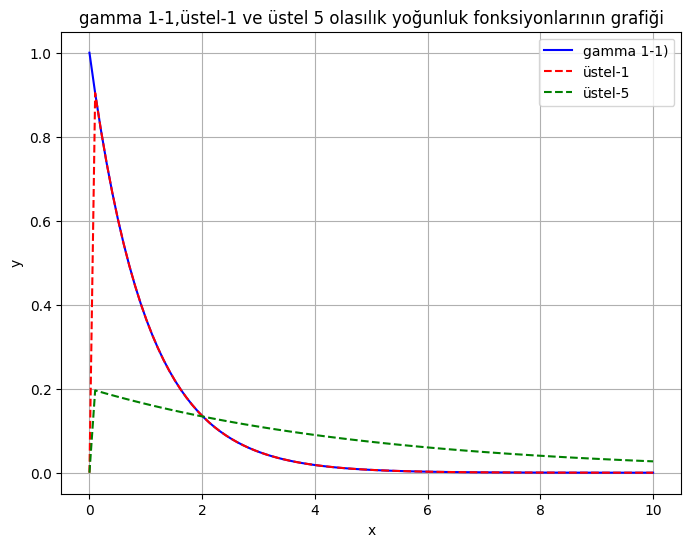

In [ ]:
import numpy as np
from scipy.special import gamma, factorial
import matplotlib.pyplot as plt

def exponential_dist(x, lambdaa):
    return np.where(x > 0, (1/lambdaa) * np.exp(-x/lambdaa), 0)


#print(exponential(0,1))

def gamma_dist(x, alpha, beta):
    return (1 / gamma(alpha) * (beta ** alpha)) * np.exp(-x / beta) * (x ** (alpha - 1))


# grafik için x değerleri
x_values = np.linspace(0, 10, 100)

# f(x) gamma g1 ve g2 üstel(1) ve üstel(5) olan verileri üretiyoruz
f_values =gamma_dist(x_values,1,1)
g1_values = exponential_dist(x_values,1)
g2_values=exponential_dist(x_values,5)


# fonksiyon çizimi
plt.figure(figsize=(8, 6))
plt.plot(x_values, f_values, label='gamma 1-1)', color='blue')
plt.plot(x_values, g1_values, label='üstel-1', linestyle='--', color='red')
plt.plot(x_values, g2_values, label='üstel-5', linestyle='--', color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.title('gamma 1-1,üstel-1 ve üstel 5 olasılık yoğunluk fonksiyonlarının grafiği')
plt.legend()
plt.grid(True)
plt.show()


In [2]:
import numpy as np
from scipy.special import gamma, factorial

def exponential_dist(x,lambdaa):
    if x > 0:
        return (1/ lambdaa)*np.exp(-x/ lambdaa)
    else:
        return 0

#print(exponential(0,1))

def gamma_dist(x,alpha,beta):
    return (1 / gamma(alpha)*(beta ** alpha))*np.exp(-x/beta)*(x**(alpha-1))


#print(gamma_dist(0,1,1))

#c yi bulmak için kullandığım fonksiyon
def find_c(N, lambdaa):
    datasett = np.random.uniform(0, 1, N)
    generated_values = []
    for i in datasett:
        valuee = exponential_dist(i, lambdaa) / gamma_dist(i,1,1)
        generated_values.append(valuee)

    return np.max(generated_values)


## kabul red yönteminin uygulandığı fonksiyon
def AR(N, lambdaa,alpha,beta):
    x = np.array([])
    Y = np.random.exponential(1,1)
    U = np.random.uniform(0, 1, 1)
    c=find_c(N, lambdaa)
    for i in range(N):
        while True:
            Y = np.random.exponential(1,1)
            U = np.random.uniform(0, 1, 1)
            if U <= exponential_dist(Y, lambdaa) / (c * gamma_dist(Y,alpha,beta)):
                x = np.append(x, Y)
                break

    return x

n=1000
print("gercek ortalama ve varyans =1 ")
dataset=AR(n,1,1,1)
datasett=AR(n,5,1,1)
print("üstel 1 ile gama 1-1 karşılaştırma")
print(np.mean(dataset))
print(np.var(dataset))
print(len(dataset)/n)
print("üstel 5 ile gama 1-1 karşılaştırma")
print(np.mean(datasett))
print(np.var(datasett))
print(len(datasett)/n)

gercek ortalama ve varyans =1 
üstel 1 ile gama 1-1 karşılaştırma
0.9940959757354506
1.0148571681938032
1.0
üstel 5 ile gama 1-1 karşılaştırma
1.2107036583479138
1.1312738025900935
1.0
